In [2]:
import os
import cv2
import numpy as np
import subprocess
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import keras
from matplotlib import pyplot as plt
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

print("hello")

def convert_to_ela_image(path, quality,image_name):
    filename = path
    resaved_filename = '/kaggle/working/' +image_name+ '.resaved.jpg'
    ELA_filename = '/kaggle/working/' +image_name+ '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    ela_im.save(ELA_filename, 'PNG')
    return ela_im
# Define a function to perform ELA using ImageMagick
# def perform_ela(input_image, output_image):
#     subprocess.call(['convert', input_image, '-resample', '50%', '-quality', '90', output_image])

images_train = []
labels_train = []
images_test = []
labels_test = []

# Create a list of image filenames and labels (0 for fake, 1 for real)
image_directory_fake_train = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake'
image_files_fake_train = os.listdir(image_directory_fake_train)
#print(image_files)
image_files_fake_train=image_files_fake_train[0:2000]



#print(image_files[0:100])
for image_file in image_files_fake_train:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        image_path = os.path.join(image_directory_fake_train, image_file)
        #print(image_path)
#         ela_path = os.path.join("/kaggle/working", 'ela_' + image_file)
#         print(ela_path)
        # Perform ELA on the image
        
#         perform_ela(image_path, ela_path)
        
#         # Load and preprocess the ELA image
#         ela_image = cv2.imread(ela_path)
#         ela_image = cv2.resize(ela_image, (128, 128))
#         ela_image = ela_image / 255.0  # Normalize to [0, 1]
        image_name=image_file.split('.')[0]
        images_train.append(array(convert_to_ela_image(image_path, 90,image_name).resize((128, 128))).flatten() / 255.0)
        labels_train.append(0)
        # Determine the label based on the image filename
#         if 'fake' in image_file:
#             labels.append(0)  # Fake
#         else:
#             labels.append(1)  # Real

# Split the data into training and testing sets

# Create a list of image filenames and labels (0 for fake, 1 for real)
image_directory_real_train = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real'
image_files_real_train = os.listdir(image_directory_real_train)
#print(image_files)
image_files_real_train=image_files_real_train[0:2000]



#print(image_files[0:100])
for image_file in image_files_real_train:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        image_path = os.path.join(image_directory_real_train, image_file)
        #print(image_path)
#         ela_path = os.path.join("/kaggle/working", 'ela_' + image_file)
#         print(ela_path)
#         # Perform ELA on the image
#         perform_ela(image_path, ela_path)
        
#         # Load and preprocess the ELA image
#         ela_image = cv2.imread(ela_path)
#         ela_image = cv2.resize(ela_image, (128, 128))
#         ela_image = ela_image / 255.0  # Normalize to [0, 1]
        image_name=image_file.split('.')[0]
        images_train.append(array(convert_to_ela_image(image_path, 90,image_name).resize((128, 128))).flatten() / 255.0)
        labels_train.append(1)
X_train=np.array(images_train)
X_train=X_train.reshape(-1,128,128,3)
y_train=np.array(labels_train)
#X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2,train_size=0.8, random_state=42)
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 output classes: Fake and Real
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
history_train=model.fit(X_train, y_train, epochs=10,validation_split = 0.1)
# Evaluate the model
#test_loss, test_accuracy = model.evaluate(X_test, y_test)
#print(f"Test accuracy: {test_accuracy * 100:.2f}%")

hello
Epoch 1/10
113/113 [==============================] - 70s 607ms/step - loss: 1.4163 - accuracy: 0.5881 - val_loss: 0.7594 - val_accuracy: 0.2500
Epoch 2/10
113/113 [==============================] - 68s 600ms/step - loss: 0.6080 - accuracy: 0.6708 - val_loss: 0.5194 - val_accuracy: 1.0000
Epoch 3/10
113/113 [==============================] - 72s 634ms/step - loss: 0.5520 - accuracy: 0.7175 - val_loss: 0.1812 - val_accuracy: 1.0000
Epoch 4/10
113/113 [==============================] - 70s 621ms/step - loss: 0.4662 - accuracy: 0.7778 - val_loss: 0.1538 - val_accuracy: 0.9975
Epoch 5/10
113/113 [==============================] - 73s 645ms/step - loss: 0.4110 - accuracy: 0.8164 - val_loss: 0.4819 - val_accuracy: 0.7650
Epoch 6/10
113/113 [==============================] - 73s 646ms/step - loss: 0.2977 - accuracy: 0.8633 - val_loss: 1.0679 - val_accuracy: 0.5225
Epoch 7/10
113/113 [==============================] - 69s 612ms/step - loss: 0.2174 - accuracy: 0.9097 - val_loss: 0.2846 - 

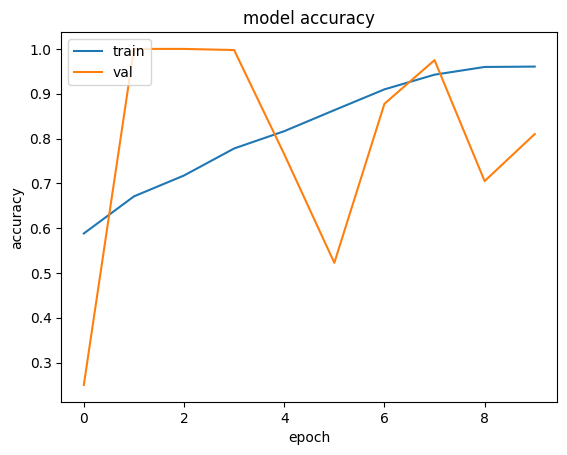

In [3]:
plt.plot(history_train.history['accuracy'])
plt.plot(history_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


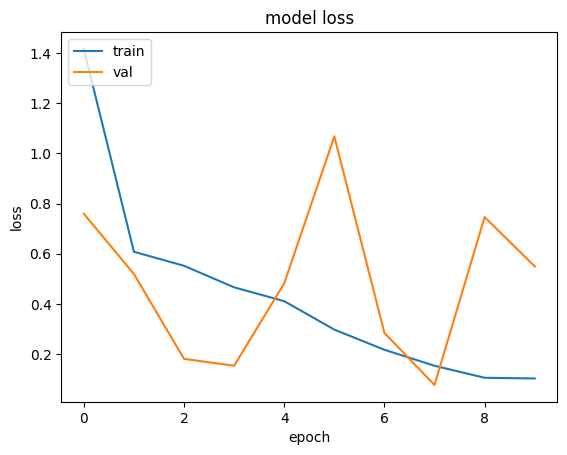

In [4]:
plt.plot(history_train.history['loss'])
plt.plot(history_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
# import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# # Replace 'your_image_path.jpg' with the actual path to your image file
# image_path = 'your_image_path.jpg'

# # Load the image using matplotlib
# img = mpimg.imread("/kaggle/working/ela_H7PRNYG8IN.jpg")

# # Display the image
# plt.imshow(img)
# plt.axis('off')  # Turn off axis labels and ticks for a cleaner display
# plt.show()

In [6]:
# # Load the image using matplotlib
# img = mpimg.imread("/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg")

# # Display the image
# plt.imshow(img)
# plt.axis('off')  # Turn off axis labels and ticks for a cleaner display
# plt.show()

In [7]:
# pip install pyforensics pillow

In [8]:
# from PIL import Image, ImageChops, ImageEnhance

# def error_level_analysis(image_path, quality=90, contrast_factor=2.0):
#     # Open the original image
#     original_image = Image.open(image_path)

#     # Save and reopen the image with specified quality
#     temp_path = '/kaggle/working/temp.jpg'
#     original_image.save(temp_path, 'JPEG', quality=quality)
#     re_saved_image = Image.open(temp_path)

#     # Calculate absolute difference
#     diff_image = ImageChops.difference(original_image, re_saved_image)

#     # Convert to grayscale
#     diff_image = diff_image.convert('L')

#     # Enhance contrast
#     enhancer = ImageEnhance.Contrast(diff_image)
#     diff_image = enhancer.enhance(contrast_factor)

#     return diff_image

# # Example usage
# image_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg'
# ela_image = error_level_analysis(image_path)

# # Display the original and ELA images
# #original_image.show()
# ela_image.show()

In [9]:
# import subprocess

# def perform_ela(input_image, output_image):
#     subprocess.call(['convert', input_image, '-resample', '50%', '-quality', '50', output_image])

# # def perform_ela(input_image, output_image):
# #     # Open a subprocess and capture the output
# #     process = subprocess.Popen(['convert', input_image, '-resample', '50%', '-quality', '90', output_image], stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
# #     out, err = process.communicate()
    
# #     # Print the captured output and error (if any)
# #     print("Output:", out)
# #     print("Error:", err)

# # Call the perform_ela function
# input_image='/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg'
# output_image='/kaggle/working/ela_H7PRNYG8IN.jpg'
# perform_ela(input_image, output_image)

# print("hello")


In [10]:
# import cv2
# import subprocess
# from matplotlib import pyplot as plt

# # Define a function to perform ELA using ImageMagick
# def perform_ela(input_image, output_image):
#     subprocess.call(['convert', input_image, '-resample', '50%', '-quality', '90', output_image])

# # Load the original image
# input_image = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg'
# original_image = cv2.imread(input_image)

# # Perform ELA and save the result
# ela_image_path = '/kaggle/working/ela_H7PRNYG8IN.jpg'
# perform_ela(input_image, ela_image_path)

# # Load the ELA image
# ela_image = cv2.imread(ela_image_path)

# # Display the original and ELA images
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(ela_image, cv2.COLOR_BGR2RGB))
# plt.title('ELA Image')
# plt.axis('off')

# plt.show()


In [11]:
# from PIL import Image
# import os
# from pylab import *
# import re
# from PIL import Image, ImageChops, ImageEnhance

In [12]:
def convert_to_ela_image(path, quality,image_name):
    filename = path
    resaved_filename = '/kaggle/working/' +image_name+ '.resaved.jpg'
    ELA_filename = '/kaggle/working/' +image_name+ '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    ela_im.save(ELA_filename, 'PNG')
    return ela_im

In [13]:
# import shutil

# source_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg'
# target_path = '/kaggle/working/H7PRNYG8IN.resaved.jpg'  # A writable directory

# shutil.copy(source_path, target_path)


**FAKE ORIGINAL AND AFTER ELA**

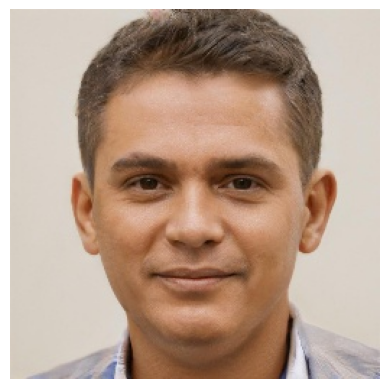

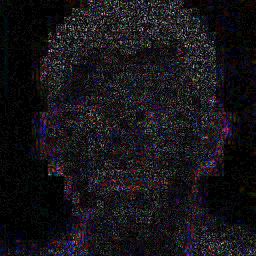

In [14]:
img = mpimg.imread("/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks for a cleaner display
plt.show()
convert_to_ela_image('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg', 90,'H7PRNYG8IN')

REAL ORIGINAL AND AFTER ELA

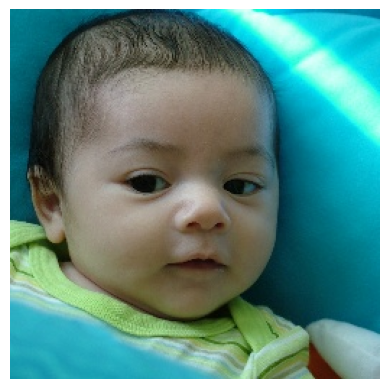

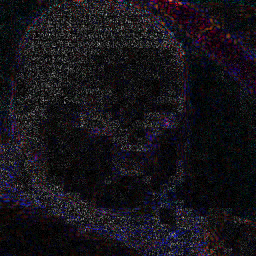

In [15]:
img = mpimg.imread("/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real/00000.jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks for a cleaner display
plt.show()
convert_to_ela_image('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real/00000.jpg', 90,'00000')

In [16]:
# X=[]
# X.append(array(convert_to_ela_image('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real/00000.jpg', 90,'00000').resize((128, 128))).flatten() / 255.0)

In [17]:
# pixel_values = X[0].reshape((128, 128,3))

# # Display the image
# plt.imshow(pixel_values, cmap='gray')  # Use cmap='gray' for grayscale images
# plt.axis('off')  # Turn off axis labels and ticks for a cleaner display
# plt.show()

In [18]:
# img = mpimg.imread(X[0])

# # Display the image
# plt.imshow(img)
# plt.axis('off')  # Turn off axis labels and ticks for a cleaner display
# plt.show()

In [19]:
images_test = []
labels_test = []

# Create a list of image filenames and labels (0 for fake, 1 for real)
image_directory_fake_test = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake'
image_files_fake_test = os.listdir(image_directory_fake_test)
#print(image_files)
image_files_fake_test=image_files_fake_test[0:500]



#print(image_files[0:100])
for image_file in image_files_fake_test:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        image_path = os.path.join(image_directory_fake_test, image_file)
        #print(image_path)
#         ela_path = os.path.join("/kaggle/working", 'ela_' + image_file)
#         print(ela_path)
#         # Perform ELA on the image
#         perform_ela(image_path, ela_path)
        
#         # Load and preprocess the ELA image
#         ela_image = cv2.imread(ela_path)
#         ela_image = cv2.resize(ela_image, (128, 128))
#         ela_image = ela_image / 255.0  # Normalize to [0, 1]
        image_name=image_file.split('.')[0]
        images_test.append(array(convert_to_ela_image(image_path, 90,image_name).resize((128, 128))).flatten() / 255.0)
        labels_test.append(0)
        # Determine the label based on the image filename
#         if 'fake' in image_file:
#             labels.append(0)  # Fake
#         else:
#             labels.append(1)  # Real

# Split the data into training and testing sets

# Create a list of image filenames and labels (0 for fake, 1 for real)
image_directory_real_test = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real'
image_files_real_test = os.listdir(image_directory_real_test)
#print(image_files)
image_files_real_test=image_files_real_test[0:500]



#print(image_files[0:100])
for image_file in image_files_real_test:
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        image_path = os.path.join(image_directory_real_test, image_file)
        #print(image_path)
#         ela_path = os.path.join("/kaggle/working", 'ela_' + image_file)
#         print(ela_path)
#         # Perform ELA on the image
#         perform_ela(image_path, ela_path)
        
#         # Load and preprocess the ELA image
#         ela_image = cv2.imread(ela_path)
#         ela_image = cv2.resize(ela_image, (128, 128))
#         ela_image = ela_image / 255.0  # Normalize to [0, 1]
        image_name=image_file.split('.')[0]
        images_test.append(array(convert_to_ela_image(image_path, 90,image_name).resize((128, 128))).flatten() / 255.0)
        labels_test.append(1)
X_test=np.array(images_test)
X_test=X_test.reshape(-1,128,128,3)
y_test=np.array(labels_test)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


32/32 [==============================] - 5s 144ms/step - loss: 0.7928 - accuracy: 0.7610
Test accuracy: 76.10%


In [20]:
test_loss

0.7928462028503418

In [21]:
test_accuracy

0.7609999775886536

In [22]:
# import os

# def remove_folder_contents(folder):
#     for the_file in os.listdir(folder):
#         file_path = os.path.join(folder, the_file)
#         try:
#             if os.path.isfile(file_path):
#                 os.unlink(file_path)
#             elif os.path.isdir(file_path):
#                 remove_folder_contents(file_path)
#                 os.rmdir(file_path)
#         except Exception as e:
#             print(e)

# folder_path = '/kaggle/working'
# remove_folder_contents(folder_path)
# os.rmdir('/kaggle/working')

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Load your image data
# Assuming 'x_train' is your training images and 'y_train' is your training labels

model_aug=model

# Create a flow from your data using the ImageDataGenerator
augmented_data = datagen.flow(X_train, y_train, batch_size=250)

# Use augmented_data for training your model
model_aug.fit(augmented_data, epochs=10, steps_per_epoch=len(X_train) // 250)

Epoch 1/10
16/16 [==============================] - 82s 5s/step - loss: 0.7056 - accuracy: 0.4995
Epoch 2/10
16/16 [==============================] - 98s 6s/step - loss: 0.6956 - accuracy: 0.5020
Epoch 3/10
16/16 [==============================] - 82s 5s/step - loss: 0.6934 - accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 85s 5s/step - loss: 0.6935 - accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 84s 5s/step - loss: 0.6933 - accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 80s 5s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 82s 5s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/10
16/16 [==============================] - 98s 6s/step - loss: 0.6931 - accuracy: 0.5005
Epoch 9/10
16/16 [==============================] - 81s 5s/step - loss: 0.6932 - accuracy: 0.4895
Epoch 10/10
16/16 [==============================] - 81s 5s/step - loss: 0.6932 - accuracy: 0.5000


In [24]:
test_loss, test_accuracy = model_aug.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

32/32 [==============================] - 5s 156ms/step - loss: 380.6680 - accuracy: 0.5000
Test accuracy: 50.00%


In [25]:
print(X_test.shape)

(1000, 128, 128, 3)


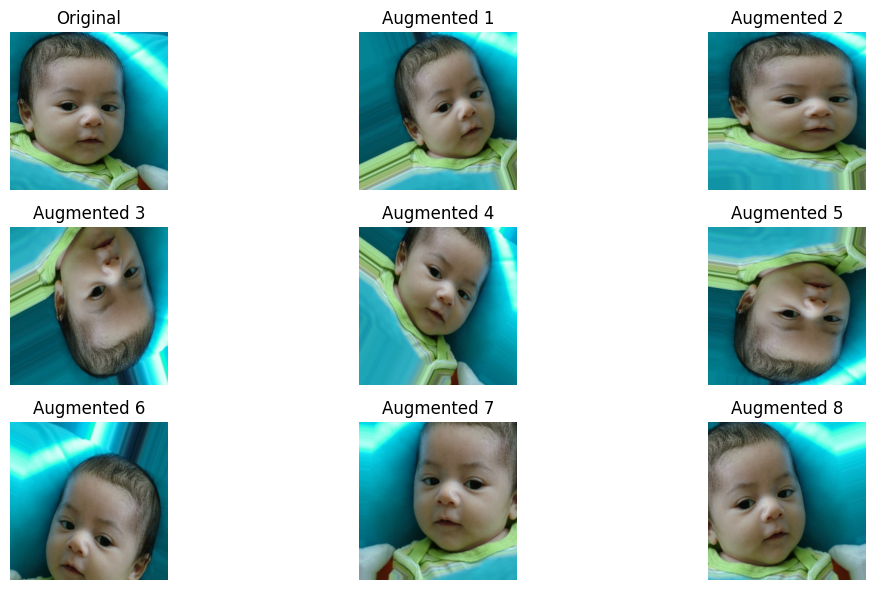

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Create an ImageDataGenerator with desired augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Load an example image for augmentation
example_image = plt.imread('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real/00000.jpg')  # Replace with your image path
example_image = example_image / 255.0
example_image = example_image.astype('float32')
# Reshape the image to match the batch size expected by datagen
example_image = example_image.reshape((1,) + example_image.shape)

# Generate augmented images
augmented_images = datagen.flow(example_image, batch_size=1)

# Display the original and augmented images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(3, 3, 1)
plt.imshow(example_image[0])
plt.title("Original")
plt.axis('off')

# Display the first 8 augmented images
for i in range(8):
    augmented_image = next(augmented_images)[0]
    plt.subplot(3, 3, i + 2)
    plt.imshow(augmented_image)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()